In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import graphviz
%matplotlib inline

## (A)

In [2]:
df = pd.read_csv("./Mushrooms.csv")
df.head()

,target,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [3]:
features = df.drop('target',axis=1)
target = df.target
features.head()

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [4]:
features.shape

(8124, 22)

In [5]:
features = pd.get_dummies(features)
features.head()

,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [6]:
features.shape

(8124, 116)

#### 8124 records
#### 22 features before one-hot encoding
#### 116 features after

## (B)

C:\Users\rileyma\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



best alpha = {'max_depth': 8}   test R2 = 0.953


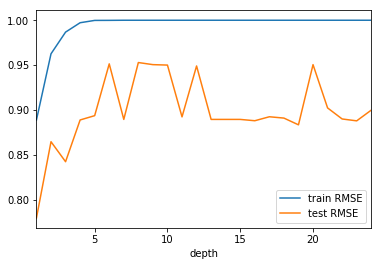

In [7]:
grid = {'max_depth':np.arange(1,25)}

tree = DecisionTreeClassifier()
treeCV = GridSearchCV(tree,param_grid=grid,return_train_score=True)
treeCV.fit(features,target)

print()
print('best alpha =',treeCV.best_params_, '  test R2 =',treeCV.best_score_.round(3))

performance = pd.DataFrame()
performance['depth'] = grid['max_depth']
performance['train RMSE'] = treeCV.cv_results_['mean_train_score']
performance['test RMSE']  = treeCV.cv_results_['mean_test_score']
ax1 = performance.plot.line(x='depth',y='train RMSE')
performance.plot.line(x='depth',y='test RMSE',ax=ax1)

#### Optimal tree depth is 8

#### Test R-squared is 0.953

## (C)

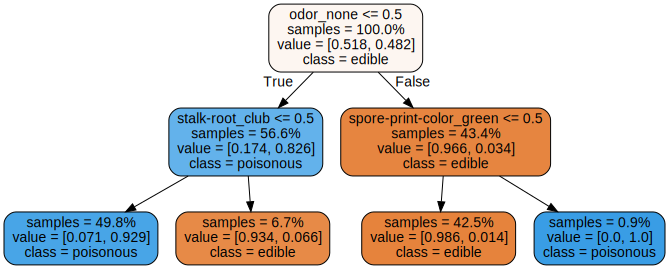

In [8]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(features,target)

dot_data = export_graphviz(tree, 
                                out_file=None,
                                feature_names=features.columns,
                                class_names=['edible','poisonous'],
                                proportion=True,
                                impurity=False,
                                filled=True,
                                rounded=True,
                               ) 
graph = graphviz.Source(dot_data) 
graph

In [10]:
graph.render('MushroomDecisionTree')

'MushroomDecisionTree.pdf'

#### Odor is the most important feature. It exists in 100% of the samples, and is a good determinant as to whether or not a mushroom is edible.

## (D)

In [11]:
target = target.astype('category')
cols = target.cat.categories
target_predicted = tree.predict(features)
ConMat= confusion_matrix(target,target_predicted)
ConMat = pd.DataFrame(ConMat,index=cols,columns=cols)
ConMat['total'] = ConMat.sum(axis=1)
ConMat

,edible,poisonous,total
edible,3920,288,4208
poisonous,84,3832,3916


In [13]:
84/(4208+3916)

0.0103397341211226

#### 0.01% probability of selecting a poisonous mushroom to eat using depth 2 tree